Name-vishal Manoharrao Gawali
Reg No-20MAI0049

# Problem 3

step 1. read image from folder  2. load in the numpy array or in excel  3. extract feature from step using builtin fun 
4. split train and test 5. learning algorihm 6. test (display test image with accuracy) 7. accuracy score, Precision, recall , F1-score 

In [1]:
#importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [3]:
# modify to fit your system
data_path = 'Image'
os.listdir(data_path)

['BearHead',
 'CatHead',
 'ChickenHead',
 'CowHead',
 'EagleHead',
 'ElephantHead',
 'MonkeyHead',
 'MouseHead',
 'PandaHead']

In [4]:
#Printing the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: C:\Users\vishal\Desktop\AI&ML 2nd sem\Deep Learning and its Applications\deeplearning lab\problem3


In [5]:
base_name = 'animal_faces'
width = 80
 
include = {'ChickenHead', 'BearHead', 'ElephantHead', 
           'EagleHead', 'DeerHead', 'MonkeyHead', 'PandaHead'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)


BearHead
ChickenHead
EagleHead
ElephantHead
MonkeyHead
PandaHead


In [6]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  615
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)animal images in rgb
image shape:  (80, 80, 3)
labels: ['Bear' 'Chicken' 'Eagle' 'Elephant' 'Monkey' 'Panda']


Counter({'Bear': 101,
         'Chicken': 100,
         'Eagle': 97,
         'Elephant': 100,
         'Monkey': 100,
         'Panda': 117})

In [7]:
Counter({'Chicken': 100,
         'Bear': 101,
         'Elephant': 100,
         'Eagle': 97,
         'Deer': 101,
         'Monkey': 100,
         'Panda': 117})

Counter({'Chicken': 100,
         'Bear': 101,
         'Elephant': 100,
         'Eagle': 97,
         'Deer': 101,
         'Monkey': 100,
         'Panda': 117})

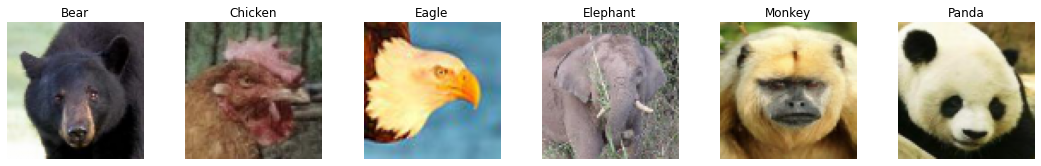

In [8]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [9]:
#Storing features of images into numpy array
X = np.array(data['data'])
y = np.array(data['label'])

In [10]:

print(X)

[[[[7.64705882e-01 8.43137255e-01 7.37254902e-01]
   [7.64705882e-01 8.43137255e-01 7.37254902e-01]
   [7.64705882e-01 8.43137255e-01 7.37254902e-01]
   ...
   [3.12178309e-01 2.88970588e-01 2.96813725e-01]
   [3.08532475e-01 2.85003064e-01 2.92846201e-01]
   [2.85768995e-01 2.62239583e-01 2.70082721e-01]]

  [[7.60784314e-01 8.39215686e-01 7.33333333e-01]
   [7.60784314e-01 8.39215686e-01 7.33333333e-01]
   [7.60784314e-01 8.39215686e-01 7.33333333e-01]
   ...
   [3.22058824e-01 2.98529412e-01 3.06372549e-01]
   [3.17401961e-01 2.93872549e-01 3.01715686e-01]
   [3.01179534e-01 2.77650123e-01 2.85493260e-01]]

  [[7.56127451e-01 8.34558824e-01 7.27941176e-01]
   [7.56127451e-01 8.34558824e-01 7.27941176e-01]
   [7.56127451e-01 8.34558824e-01 7.27941176e-01]
   ...
   [3.30147059e-01 3.06617647e-01 3.14460784e-01]
   [3.20327819e-01 2.96798407e-01 3.04641544e-01]
   [3.05070466e-01 2.81541054e-01 2.89384191e-01]]

  ...

  [[9.96078431e-01 9.96078431e-01 9.92156863e-01]
   [9.96078431e-

In [11]:
print(y)

['Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear'
 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear'
 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear'
 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear'
 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear'
 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear'
 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear'
 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear'
 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear'
 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear' 'Bear'
 'Bear' 'Chicken' 'Chicken' 'Chicken' 'Chicken' 'Chicken' 'Chicken'
 'Chicken' 'Chicken' 'Chicken' 'Chicken' 'Chicken' 'Chicken' 'Chicken'
 'Chicken' 'Chicken' 'Chicken' 'Chicken' 'Chicken' 'Chicken' 'Chicken'
 'Chicken' 'Chicken' 'Chicken' 'Chicken' 'Chicken' 'Chicken' 'Chicken'
 'Chicken

In [12]:
#Spliting the Dataset Train 80% and test 20%
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

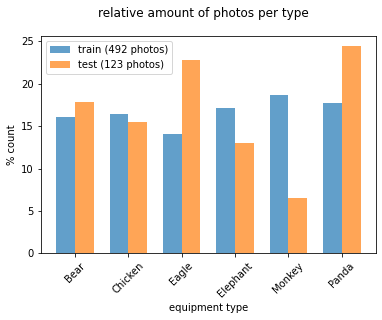

In [13]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [15]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale

# Train Modal using MLPClassifier 

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
from sklearn.neural_network import MLPClassifier 
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(492, 576)


In [17]:
sgd_clf = MLPClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

MLPClassifier(max_iter=1000, random_state=42, tol=0.001)

In [18]:
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)

In [19]:
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:25])
print('')
print('Accuracy: ', 100*np.sum(y_pred == y_test)/len(y_test))

[ True  True  True  True  True  True  True  True False False False  True
  True  True False  True  True  True False  True  True  True  True  True
  True]

Accuracy:  87.8048780487805


In [20]:
#Importing panda
import pandas as pd
labels = ['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',  'no', 'no', 'no']
predictions = ['yes', 'yes', 'yes', 'yes', 'no',  'no',  'yes', 'no', 'no', 'no']
 
# put the data in a dataframe for pretty printing
df = pd.DataFrame(
    np.c_[labels, predictions], 
    columns=['true_label', 'prediction']
)
df

,true_label,prediction
0,yes,yes
1,yes,yes
2,yes,yes
3,yes,yes
4,yes,no
5,yes,no
6,no,yes
7,no,no
8,no,no
9,no,no


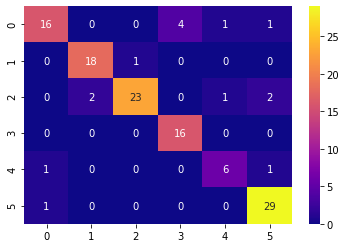

In [21]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm1=confusion_matrix(y_test,y_pred)
sns.heatmap(cm1, cmap="plasma",annot=True)

In [22]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.8780487804878049

In [23]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.8780487804878049

In [24]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average="macro"))

0.8626683501683502


In [25]:
print('Accuracy: ', 100*np.sum(y_pred == y_test)/len(y_test))

Accuracy:  87.8048780487805
